### 타이타닉

1. 데이터 셋 확인
2. EDA
3. 특성 공학
4. 모델 개발 및 학습
5. 모델 예측 및 평가



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

In [2]:
# seaborn scheme 로 세팅하고 font_scale 세팅.
plt.style.use('seaborn')
sns.set(font_scale=2.5) 

# 결측데이터를 파악하는데 직관적인 도움을 주는 패키지.
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 브라우저에서 결과 바로 볼 수 있게 해줌.
%matplotlib inline

In [3]:
os.listdir("/content/drive/MyDrive/titanic")

['gender_submission.csv', 'test.csv', 'train.csv']

In [4]:
df_train = pd.read_csv("/content/drive/MyDrive/titanic/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/titanic/test.csv")
df_submit = pd.read_csv("/content/drive/MyDrive/titanic/gender_submission.csv")



### 1.데이터 셋 확인

- 데이터가 어떻게 구성되어 있는지 확인한다.
- null data를 확인하고 수정한다.


In [7]:
df_train.shape, df_test.shape, df_submit.shape

# train 할 데이터 수는 891개, test해야 할 데이터 수는 418개를 확인해 볼 수 있다.

((891, 12), (418, 11), (418, 2))

In [8]:
# 칼럼들은 다음과 같다.

df_train.columns

# 칼럼은 12개로 이루어져 있으며, 학습에 사용해야 할  feature는 11개, 
# 예측해야 할 feature는 survived 이다.

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df_submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [10]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


타이타닉 데이터 feature 설명
- survival : 생존 유무 ( target 변수 )
- plcass : 티켓 클래스 ( 1st, 2nd, 3rd)
- sex : 성별
- age : 나이
- sibsp : 함께 탑승한 형제자매, 배우자 수 총합
- parch : 함께 탑승한 부모, 자녀 수 총합
- ticket : 티켓 넘버
- fare : 탑승 요금
- cabin : 객실 넘버
- bembarked : 탑승 항구

In [13]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# 결측치 확인

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# 결측치 비율 확인

df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [19]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

'age'에 약 20%, 'cabin'에 약 80%에 달하는 결측치가 있는것을 확인했다

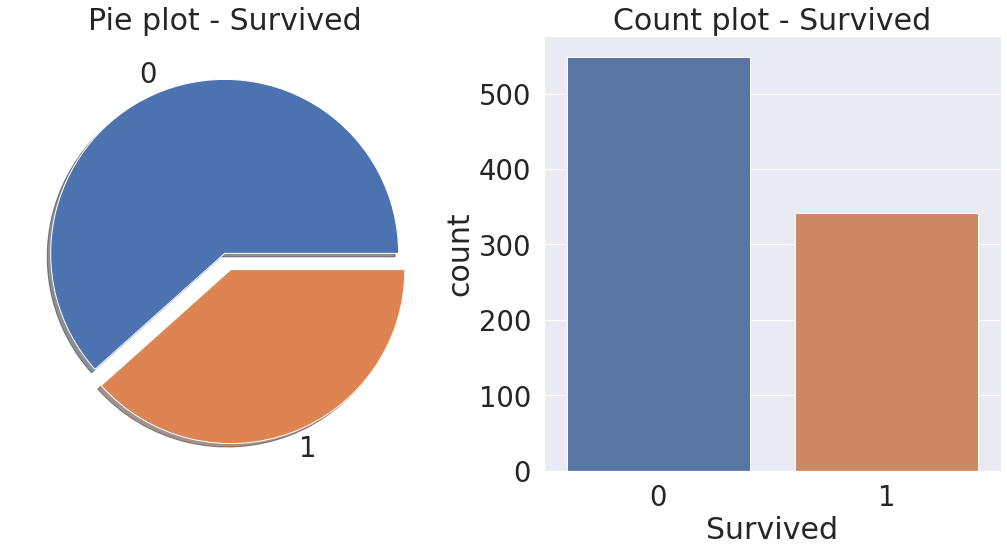

In [29]:
#프레임 나누기
f, ax = plt.subplots(1,2, figsize=(18,8))

# pie plot 
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

# countplot
sns.countplot('Survived',data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

불균형 데이터인지 먼저 살펴봐야 하는데 다행히도 균형적인 데이터이다.

### 2. 탐색적 데이터 분석

데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요합니다.

1. pclass
: 순서가 있는 데이터 타입
: groupby 나 pivot 메소드를 활용할 것.


In [35]:
df_train[['Pclass','Survived']].groupby(['Pclass']).count()

# class 1에 216명, 2에 184명, 3에 491명이 있다.

,Survived
Pclass,
1,216
2,184
3,491


In [37]:
df_train[['Pclass','Survived']].groupby(['Pclass']).sum()

# 그 중에서 생존자 수는 136,87,119 명이다.


,Survived
Pclass,
1,136
2,87
3,119


In [38]:
# 이런 작업은 crosstab으로 편하게 할 수 있다.

pd.crosstab(df_train['Pclass'],df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [40]:
# 그래서 생존률은?
df_train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


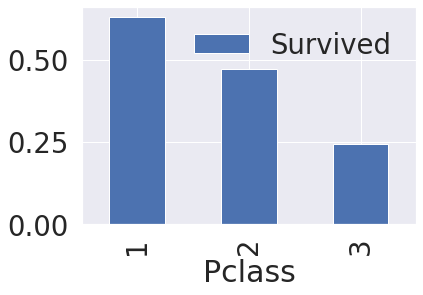

In [39]:
# 시각화 해보기
df_train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

#pclass가 높을 수록 생존률이 올라간 것을 확인할 수 있다.

2.sex